### Loading Libraries

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

plt.style.use('ggplot')

In [125]:
# load data
df = pd.read_csv('amazon_reviews.csv')

In [126]:
# where the analysis will take part
df[['Summary', 'Text']]

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...
...,...,...
1995,Great Waffles for us non-cooks,I have to laugh at the reviews that said it wa...
1996,Excellent Fluffy Pancakes.....,I had read some favorable reviews of this panc...
1997,Good Basic Mix,I was expecting great things based on the revi...
1998,"Good pancakes, lots of work",I love this pancake mix. I bought my first ca...


### Text Processing

In [127]:
wnl = WordNetLemmatizer() # instantiate the Lemmatizer object
processed_texts = []
stop_words = stopwords.words('english') # stopwords list


for text in df['Text']:
    doc_tokens = []
    sent_tokenized = nltk.sent_tokenize(text) # tokenize sentences
    for sent in sent_tokenized:
        words = nltk.word_tokenize(sent) # tokenize words
        cleaned = [wnl.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words] # stopword removal, lemmatization
        doc_tokens.extend(cleaned)
    processed_texts.append(doc_tokens)


fully_processed_texts = []
for text in processed_texts:
    text = ' '.join(text) # convert to a more readable format
    fully_processed_texts.append(text)

df['processed_text'] = fully_processed_texts # assign to df as a new column

In [128]:
df[['Text', 'processed_text']]

,Text,processed_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...
...,...,...
1995,I have to laugh at the reviews that said it wa...,laugh review said much work add egg little but...
1996,I had read some favorable reviews of this panc...,read favorable review pancake mix amazon quite...
1997,I was expecting great things based on the revi...,expecting great thing based review good great ...
1998,I love this pancake mix. I bought my first ca...,love pancake mix bought first whole food marke...


### Getting sentiment values out

In [129]:
sia = SentimentIntensityAnalyzer() # sentiment object initialize

sentiment_values = {}
for i, row in df.iterrows():
    text = row['processed_text']
    myid = row['Id']
    sentiment_values[myid] = sia.polarity_scores(text)

sentiment_df = pd.DataFrame(sentiment_values).T.reset_index(drop=True) # storing sentiment values in a df

df = pd.concat([df, sentiment_df], axis=1) # combining the original df with the new sentiment values 

In [130]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,processed_text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...,0.132,0.576,0.292,0.8624
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,B001E5E29A,A3IJNH61DY5N9K,Sharon Allan,10,11,5,1265846400,Great Waffles for us non-cooks,I have to laugh at the reviews that said it wa...,laugh review said much work add egg little but...,0.000,0.554,0.446,0.9731
1996,1997,B001E5E29A,A35W3JQYP0M655,"Ambergris ""John Thomas""",7,7,5,1279929600,Excellent Fluffy Pancakes.....,I had read some favorable reviews of this panc...,read favorable review pancake mix amazon quite...,0.026,0.614,0.360,0.9961
1997,1998,B001E5E29A,A3CLWZGMC7M9Z1,"Hippie2MARS ""Hippie2MARS""",6,6,4,1250640000,Good Basic Mix,I was expecting great things based on the revi...,expecting great thing based review good great ...,0.000,0.503,0.497,0.9498
1998,1999,B001E5E29A,A2V6P1FKRHCVQQ,S. Jackson,8,9,4,1265760000,"Good pancakes, lots of work",I love this pancake mix. I bought my first ca...,love pancake mix bought first whole food marke...,0.098,0.705,0.197,0.7003


### Plotting

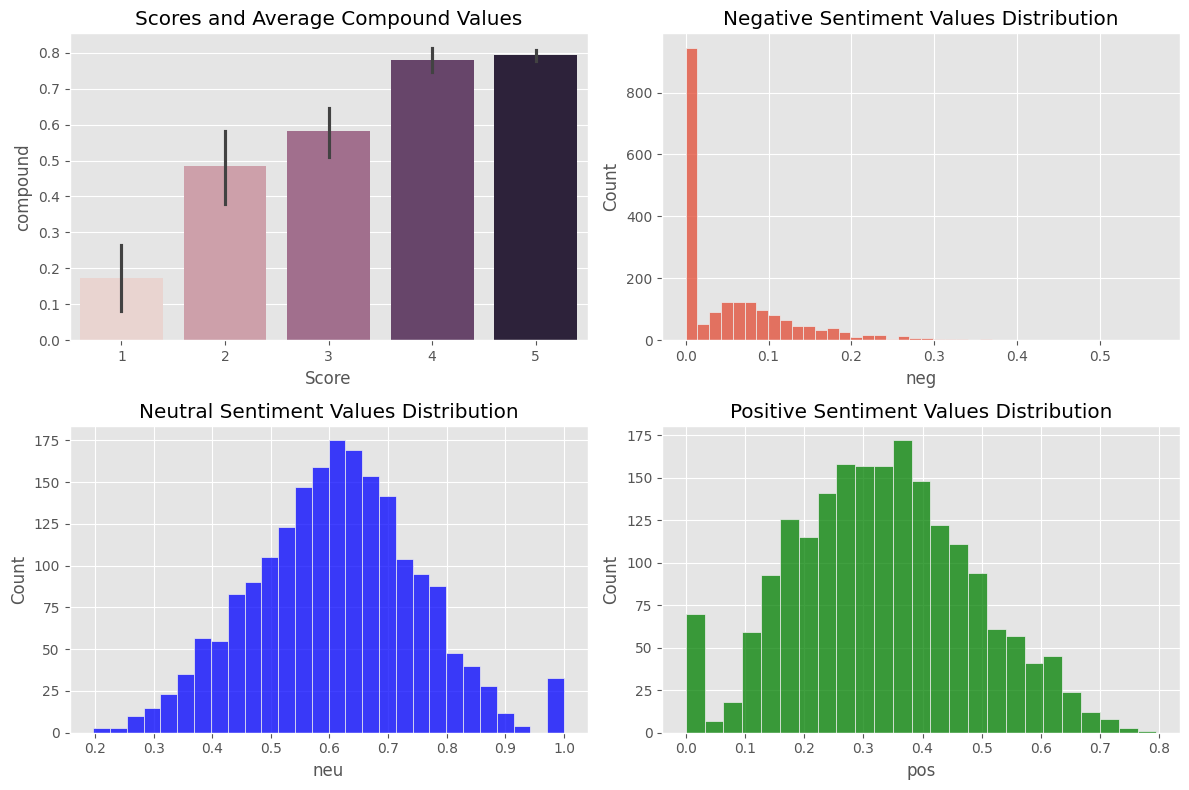

In [151]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(data=df, x='Score', y='compound', hue='Score', ax=axs[0, 0], legend=False, estimator='mean')
sns.histplot(data=df, x='neg', ax=axs[0,1])
sns.histplot(data=df, x='neu', ax=axs[1,0], color='blue')
sns.histplot(data=df, x='pos', ax=axs[1,1], color='green')

axs[0,0].set_title('Scores and Average Compound Values')
axs[0,1].set_title('Negative Sentiment Values Distribution')
axs[1,0].set_title('Neutral Sentiment Values Distribution')
axs[1,1].set_title('Positive Sentiment Values Distribution')

plt.tight_layout()
plt.show()